In [1]:
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import pickle, os, gc, re, sys

sns.set();
sns.set_palette("colorblind")

from IPython.display import display, display_html, HTML
from IPython.core.debugger import set_trace
# plt.rcParams["axes.grid"] = False

import Jupyter_module_loader
# sys.path.insert(1, '/path/to/application/app/folder')
from utility import *
# import gaussian_kde

# import warnings
# warnings.filterwarnings('ignore')

import holoviews as hv
from holoviews import opts

encoding = "ISO-8859-1"

# you should clone this git to a subdirectory called 'BES_analysis_code' (in some directory - I call it BES_analysis - doesn't matter though)
# %matplotlib inline



Toggle code

In [2]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

In [3]:
df_corrs_ni_nm = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df_corrs_ni_nm.zip",compression='zip')
df = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df.zip",compression='zip')
df_merged = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df_merged.zip",compression='zip')

In [4]:
year_corrs = df.corrwith(df["year"])

In [5]:
year_corrs.dropna().sort_values().head(50)

(ches)eu15                                     -0.432979
(manifesto)peruncod                            -0.373753
(ees14)per_v2_107a                             -0.275975
(ees14)per_v2_6051a                            -0.275708
(pip)Index Budge et al.: International Peace   -0.271974
(manifesto)per101                              -0.266533
(ees14)per_v2_7031b                            -0.255634
(pip)Index Jahn: GG Core                       -0.248638
(pip)Index Jahn: GG Core (Unstandardized)      -0.248638
(ches)eu_asylum                                -0.241320
(manifesto)intpeace                            -0.230888
(ees14)per_v2_306a                             -0.225376
(manifesto)per202_3                            -0.220718
(ees14)per_v2_104b                             -0.217904
(ees14)per_v3_104b                             -0.217327
(ees14)per_v2_1011a                            -0.217297
(manifesto)per704                              -0.216663
(ees14)per_v2_7031a            

In [6]:
year_corrs.dropna().sort_values().tail(50)

(pip)partyfacts_id_cmp                     0.139289
(ees14)per_v1_4086b                        0.141274
(ees14)partyfacts_id_ees_id                0.141384
(ees14)per_v1_4082a                        0.146452
(ees14)per_v1_414b                         0.147288
(ees14)per_v_099                           0.147291
(manifesto)per605_2                        0.150544
(ees14)per_v2_303a                         0.152741
(ches)galtan_salience                      0.155812
(ees14)per_v2_408b                         0.156270
(manifesto)per108                          0.158698
(ches)eumember__Other                      0.158738
(manifesto)per502                          0.167001
(pimpo)immi_pos                            0.172309
(pimpo)party                               0.173946
(pip)Index Budge et al.: Welfare           0.174595
(manifesto)testresult                      0.179930
partyfacts_id                              0.186514
(manifesto)per303                          0.187382
(ches)eu_dis

In [7]:
df["(manifesto)welfare"].notnull().sum()

4548

In [8]:
df["(manifesto)family"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
237    NaN
238    NaN
239    NaN
240    NaN
241    NaN
Name: (manifesto)family, Length: 11819, dtype: object

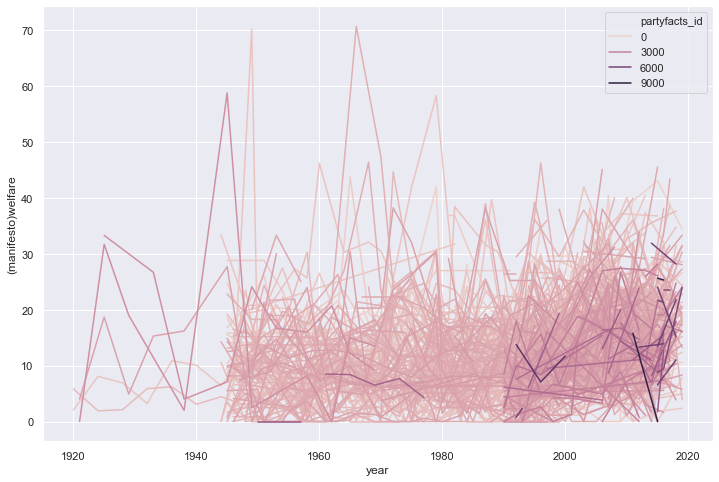

In [9]:
plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="year",hue="partyfacts_id",y="(manifesto)welfare");

Wall time: 27.1 s


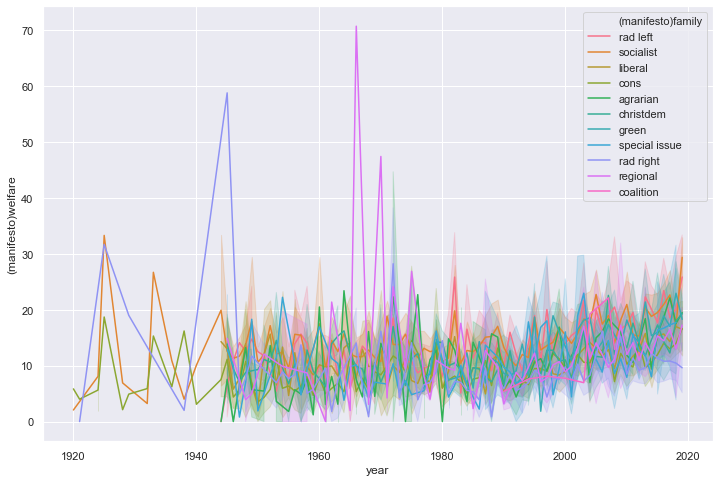

In [10]:
%%time

plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="year",hue="(manifesto)family",y="(manifesto)welfare");


# df["(manifesto)family"]

Wall time: 27.6 s


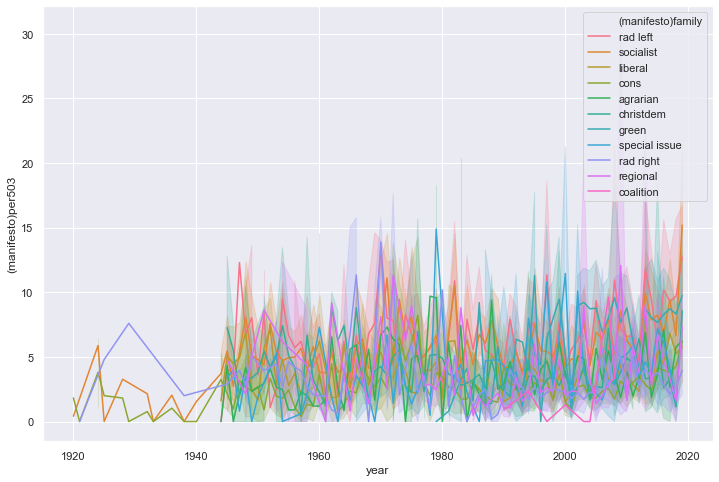

In [12]:
%%time

plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="year",hue="(manifesto)family",y="(manifesto)per503");


# df["(manifesto)family"]

Wall time: 28.7 s


Text(0.5, 1.0, 'Welfare State Expansion (%Manifesto Coded Quasi-Sentences) over time by party family')

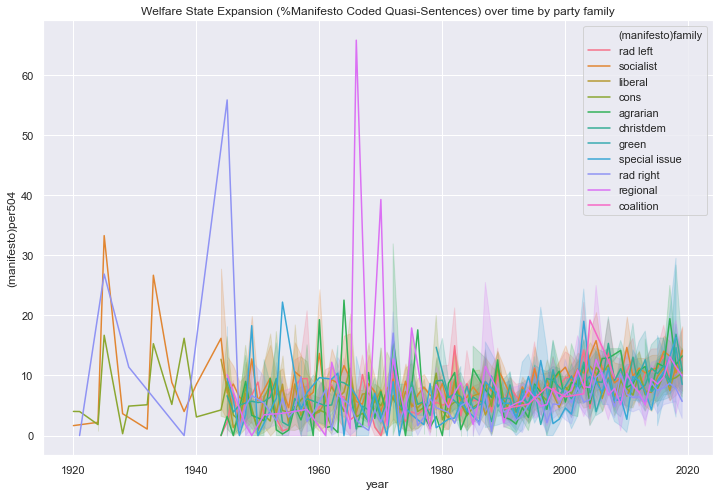

In [15]:
%%time

plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="year",hue="(manifesto)family",y="(manifesto)per504");
plt.title("Welfare State Expansion (%Manifesto Coded Quasi-Sentences) over time by party family")

# df["(manifesto)family"]

Wall time: 26.8 s


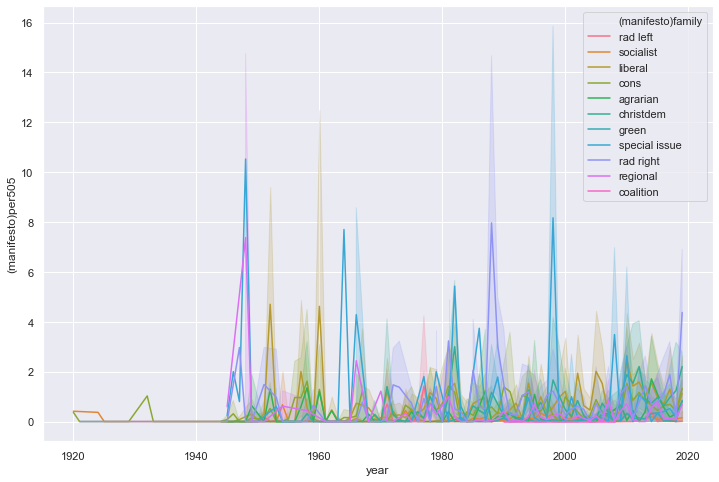

In [14]:
%%time

plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="year",hue="(manifesto)family",y="(manifesto)per505");


# df["(manifesto)family"]

In [11]:
partyfacts_core_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-core-parties.csv")
partyfacts_external_parties = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-external-parties.csv")
partyfacts_countries = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-countries.csv")
partyfacts_datasets = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-datasets.csv")

pf_country_to_code = partyfacts_countries[["country","name"]].set_index("name")["country"].apply(lambda x: x.lower())

In [12]:
shared_columns = ["partyfacts_id","year","edate","dataset","dataset_index","country"]
shared_description = {"partyfacts_id":"PartyFacts party id","year":"observative year","edate":"observation full date",
                      "dataset":"Source dataset (partyfacts schema when present)","dataset_index":"Source dataset row index","country":"ISO 3166-1 alpha-3 country codes"}

In [13]:
parlgov_party = pd.read_pickle(dataset_folder+"PARLGOV"+os.sep+ "parlgov_party_linked.zip",compression='zip')


parlgov_party["country_name_short"] = parlgov_party["country_name_short"].apply(lambda x: x.lower())
parlgov_party = parlgov_party.rename(columns = {"country_name_short":"country"})

# dummy family and try to line it up with CHES family categories
# aligning to the ches family 'standard'
# note - socdem -> socialist and communist/socialist -> rad left, Right-wing -> rad right
# and no 'confessional' option just "special issue"
family_replace_dict = {'Liberal':'liberal', 'Conservative':'cons', 'Social democracy':'socialist', 'Right-wing':'rad right',
       'Special issue':'special issue', 'Communist/Socialist':'rad left', 'no family':'no family',
       'Christian democracy':'christdem', 'Green/Ecologist':'green', 'Agrarian':'agrarian', 'to be coded':np.nan}
parlgov_party["family_name"] = parlgov_party["family_name"].replace(family_replace_dict)
#family__no family
dummies = pd.get_dummies(parlgov_party["family_name"] ,prefix="family", prefix_sep='__')
dummies.loc[parlgov_party["family_name"].isnull(),:] = np.nan
parlgov_party[dummies.columns]  =dummies
dataset = "parlgov"
ds_brac = "("+dataset+")"

parlgov_party["dataset"] = dataset
parlgov_party["dataset_index"] = parlgov_party.index
parlgov_party = parlgov_party.rename(columns={x:ds_brac+x for x in parlgov_party.columns if x not in shared_columns})

parlgov_party[["partyfacts_id"]].isnull().sum(), parlgov_party.shape

(partyfacts_id    279
 dtype: int64,
 (1651, 39))

In [14]:
## subtract party founded year from current year to get Age of Party

## Ditto year ended -> Years Until Death

In [15]:
party_founded = partyfacts_core_parties.set_index("partyfacts_id")["year_first"]
# ["year_first"]


In [16]:
df["party_age"] = df.apply(lambda x: x["year"]-party_founded.loc[x["partyfacts_id"]] if pd.notnull(x["partyfacts_id"]) else np.nan, axis=1)
# ["Party Age"]

# = df["year"] - df["partyfacts_id"]

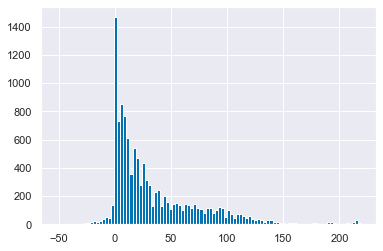

In [17]:
df["party_age"].hist(bins=100)


## negative age parties???

Wall time: 1.41 s


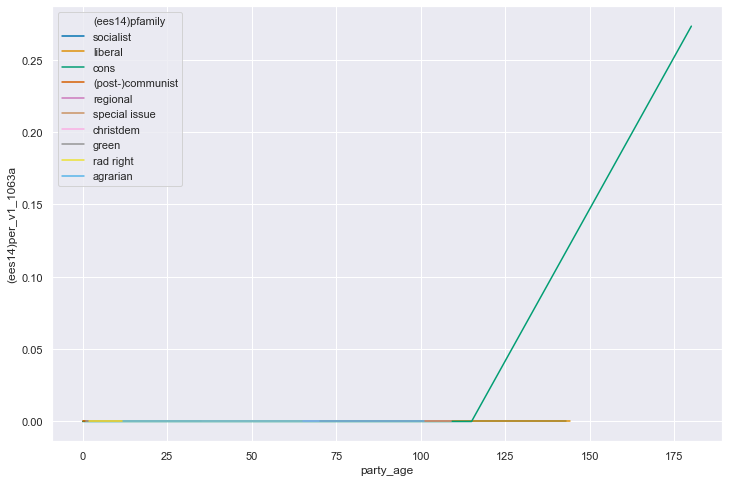

In [27]:
%%time

plt.figure(figsize=(12,8));
sns.lineplot(data=df, x="party_age",hue="(ees14)pfamily",y="(ees14)per_v1_1063a");

In [26]:
search(df,"family")

(ches)family                        1180
(ches)family__agrarian              1180
(ches)family__christdem             1180
(ches)family__confessional          1180
(ches)family__cons                  1180
(ches)family__green                 1180
(ches)family__liberal               1180
(ches)family__no family             1180
(ches)family__rad left              1180
(ches)family__rad right             1180
(ches)family__regionalist           1180
(ches)family__socialist             1180
(manifesto)family                   4578
(manifesto)family__agrarian         4578
(manifesto)family__christdem        4578
(manifesto)family__coalition        4578
(manifesto)family__cons             4578
(manifesto)family__green            4578
(manifesto)family__liberal          4578
(manifesto)family__rad left         4578
(manifesto)family__rad right        4578
(manifesto)family__regional         4578
(manifesto)family__socialist        4578
(manifesto)family__special issue    4578
(ees14)pfamily  

In [19]:
age_corrs = df.corrwith(df["party_age"])

In [20]:
age_corrs.dropna().sort_values().tail(50)

(ches)immig_dissent                                  0.160039
(ches)mip_three__social lifestyle                    0.160996
(ches)mip_one__services vs taxes                     0.161284
(ches)mip_three__state intervention                  0.162621
(ees14)per_v1_1062a                                  0.163559
(ees14)per_v2_319b                                   0.163637
(ches)enlargw                                        0.166405
(pip)Existence of a party                            0.173163
(ees14)per_v3_314a                                   0.174970
(ees14)per_v3_70532a                                 0.176539
(ees14)per_v3_107a                                   0.183361
(ees14)per_v1_1061a                                  0.185195
(ees14)per_v3_1061a                                  0.185929
(pimpo)inti_pos                                      0.186405
(ches)eu_asylum_dissent                              0.188333
(ees14)per_v2_40821a                                 0.190292
(ches)mu

In [21]:
age_corrs.dropna().sort_values().head(50)

(ches)russia_role                            -0.337989
(ches)cmp_id                                 -0.334910
(ches)corrupt_salience                       -0.303829
(ches)intgroup__no affiliation               -0.286496
(ees14)partyfacts_id_ees_id                  -0.259321
(ches)languages                              -0.259241
(ches)antielite_salience                     -0.234452
(ees14)emcs_id                               -0.227815
(ees14)marpor                                -0.224352
(pip)Party code according to CMP             -0.206801
(ches)mip_one__anti-elite                    -0.193746
(ches)cosmo_salience                         -0.191999
(ches)mip_two__corruption                    -0.187708
(ches)people_vs_elite                        -0.184929
(ches)eu_agri                                -0.176762
(ches)oligarchs                              -0.175029
(ees14)mfamily__green                        -0.168445
(ees14)ofamily__green                        -0.166820
(ches)fami

In [31]:
party_died = partyfacts_core_parties.set_index("partyfacts_id")["year_last"]

df["years_until_death"] = df.apply(lambda x: party_died.loc[x["partyfacts_id"]]-x["year"] if pd.notnull(x["partyfacts_id"]) else np.nan, axis=1)

death_corrs = df.corrwith(df["years_until_death"])

In [33]:
death_corrs.dropna().sort_values().head(50)

(ches)membership_sd                       -1.000000
(ees14)lifestyle                          -1.000000
(ees14)per_v2_3192b                       -0.989030
(ees14)per_v2_319b                        -0.989030
(ees14)per_v1_40824a                      -0.982047
(ees14)per_v2_3162a                       -0.727681
(manifesto)date                           -0.674217
(pimpo)date                               -0.666313
year                                      -0.659518
(ees14)per_v2_60113a                      -0.658172
(pip)Consecutive number of the quarters   -0.649065
(ees14)per_v2_40821a                      -0.648939
(ees14)per_v2_404b                        -0.625454
(ees14)per_v1_316a                        -0.625454
(manifesto)coderyear                      -0.493468
(ees14)per_v1_1014a                       -0.478705
(ches)galtan_clear                        -0.459460
(ches)mip_one__urban vs rural             -0.447098
(ches)mip_two__environment                -0.447098
(ches)mip_th

In [32]:
death_corrs.dropna().sort_values().tail(50)

# for parties that died, the closer they came to death the more vague their position the lib-auth axis?

(ees14)per_v2_301a                     0.192310
(ees14)per_v2_60112b                   0.196779
(ees14)per_v1_1041a                    0.196779
(ees14)per_v1_20122a                   0.196779
(ees14)per_v1_10112a                   0.196779
(ees14)per_v2_10112a                   0.196779
(ees14)per_v2_312a                     0.197038
(ees14)per_v2_607a                     0.201542
(ees14)mfamily__cons                   0.202754
(ees14)per_v2_40823a                   0.203306
(ches)mip_three__redistribution        0.205189
(ees14)per_v2_5011a                    0.206261
(ees14)per_v2_7051a                    0.206774
(pip)Existence of a party              0.207816
(ees14)per_v2_40824b                   0.217614
(ees14)mfamily__rad left               0.217755
(ches)mip_one__state intervention      0.221237
(ches)galtan_blur                      0.222750
(ches)eu_cohesion_dissent              0.232145
(ches)mip_two__state intervention      0.232637
(ches)mip_two__urban vs rural          0